## Exploratory Data Analysis and Visualization

### Team Seaborn (Capstone Project)

In [24]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import textwrap
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [25]:
# load dataset
#df_diet = pd.read_excel('country_diet_seaborn_project_cleaned_dataset_20230419_1.xlsx')

# load dataset
df_country_burden = pd.read_excel('country_burden.xlsx')
df_diet = pd.read_excel('country_diet.xlsx')

## Country Burden of Malnutrition

### Data Cleaning

In [26]:
# finding the average of the malnutrition features
ow = df_country_burden.loc[:, "overweight_2000":"overweight_2021"]
df_country_burden['overall_overweight'] = ow.mean(axis=1)
df_country_burden = df_country_burden.drop(df_country_burden.loc[:, "overweight_2000":"overweight_2021"].columns, axis=1)


stunt = df_country_burden.loc[:, "stunting_2000":"stunting_2021"]
df_country_burden['overall_stunting'] = stunt.mean(axis=1)
df_country_burden = df_country_burden.drop(df_country_burden.loc[:, "stunting_2000":"stunting_2021"].columns, axis=1)

waste = df_country_burden.loc[:, "wasting_2000":"wasting_2021"]
df_country_burden['overall_wasting'] = waste.mean(axis=1)
df_country_burden = df_country_burden.drop(df_country_burden.loc[:, "wasting_2000":"wasting_2021"].columns, axis=1)


In [27]:
df_country_burden.head()

,iso3,country,region,subregion,disaggregation,disagg.value,section,overall_overweight,overall_stunting,overall_wasting
0,AFG,Afghanistan,Asia,Southern Asia,age,0-23 months,Burden of malnutrition,5.655000,29.205000,10.420000
1,AFG,Afghanistan,Asia,Southern Asia,age,24-35 months,Burden of malnutrition,3.893333,53.940000,6.533333
2,AFG,Afghanistan,Asia,Southern Asia,age,36-47 months,Burden of malnutrition,4.803333,51.983333,4.366667
3,AFG,Afghanistan,Asia,Southern Asia,age,48-59 months,Burden of malnutrition,4.476667,50.923333,4.226667
4,AFG,Afghanistan,Asia,Southern Asia,all,Free from,Burden of malnutrition,NaN,NaN,NaN


In [28]:
# fill the missing values with 0
df_BOM = df_country_burden.fillna(0)

In [29]:
# find the rows with disaggregation = sex
df_BOM = df_BOM.query('disaggregation == "sex"')

In [30]:
# find rows where disaggregation value is not boy or girl
df_BOM = df_BOM[df_BOM['disagg.value'].str.contains('Both|Boys Projection|Female Projection|Female|Male|Male Projection|Girls Projection') == False]

In [31]:
# check shape
df_BOM.shape

(382, 10)

In [32]:
# count the values
df_BOM['disagg.value'].value_counts()

Boys     191
Girls    191
Name: disagg.value, dtype: int64

In [33]:
df_BOM.head()

,iso3,country,region,subregion,disaggregation,disagg.value,section,overall_overweight,overall_stunting,overall_wasting
24,AFG,Afghanistan,Asia,Southern Asia,sex,Boys,Burden of malnutrition,5.070000,46.523333,8.103333
28,AFG,Afghanistan,Asia,Southern Asia,sex,Girls,Burden of malnutrition,4.206667,45.370000,7.376667
62,AGO,Angola,Africa,Middle Africa,sex,Boys,Burden of malnutrition,3.150000,36.705000,6.885000
66,AGO,Angola,Africa,Middle Africa,sex,Girls,Burden of malnutrition,3.600000,30.120000,6.190000
100,ALB,Albania,Europe,Southern Europe,sex,Boys,Burden of malnutrition,23.640000,25.902500,8.327500


## Diet Data

In [34]:
# find average of each diet feature

col = df_diet.loc[: , "continued_breastfeeding_1yr_2000":"continued_breastfeeding_1yr_2020"]
df_diet['continued_breastfeeding_1yr'] = col.mean(axis=1)
df_diet = df_diet.drop(df_diet.loc[:, "continued_breastfeeding_1yr_2000":"continued_breastfeeding_1yr_2020"].columns, axis=1)

col_1 = df_diet.loc[:, "early_initiation_2000":"early_initiation_2020"]
df_diet['early_initiation'] = col_1.mean(axis=1)
df_diet = df_diet.drop(df_diet.loc[:, "early_initiation_2000":"early_initiation_2020"].columns, axis=1)

col_2 = df_diet.loc[:, "exclusive_breastfeeding_2000":"exclusive_breastfeeding_2020"]
df_diet['exclusive_breastfeeding'] = col_2.mean(axis=1)
df_diet = df_diet.drop(df_diet.loc[:, "exclusive_breastfeeding_2000":"exclusive_breastfeeding_2020"].columns, axis=1)

col_3 = df_diet.loc[:, "minimum_accept_diet_2009":"minimum_accept_diet_2020"]
df_diet['minimum_accept_diet'] = col_3.mean(axis=1)
df_diet = df_diet.drop(df_diet.loc[:, "minimum_accept_diet_2009":"minimum_accept_diet_2020"].columns, axis=1)

col_4 = df_diet.loc[:, "minimum_diet_diversity_2005":"minimum_diet_diversity_2020"]
df_diet['minimum_diet_diversity'] = col_4.mean(axis=1)
df_diet = df_diet.drop(df_diet.loc[:, "minimum_diet_diversity_2005":"minimum_diet_diversity_2020"].columns, axis=1)

col_5 = df_diet.loc[:, "minimum_meal_2006":"minimum_meal_2020"]
df_diet['minimum_meal'] = col_5.mean(axis=1)
df_diet = df_diet.drop(df_diet.loc[:, "minimum_meal_2006":"minimum_meal_2020"].columns, axis=1)

col_6 = df_diet.loc[:, "solid_foods_2000":"solid_foods_2020"]
df_diet['solid_foods'] = col_6.mean(axis=1)
df_diet = df_diet.drop(df_diet.loc[:, "solid_foods_2000":"solid_foods_2020"].columns, axis=1)

In [35]:
# fill missing values with 0
df_diet = df_diet.fillna(0)

In [36]:
# find rows where disaggregation is age
df_diet_new = df_diet.query('disaggregation == "age"')

In [37]:
# print shape
df_diet_new.shape

(885, 14)

In [38]:
df_diet_new.head(15)

,iso3,country,region,subregion,disaggregation,disagg.value,section,continued_breastfeeding_1yr,early_initiation,exclusive_breastfeeding,minimum_accept_diet,minimum_diet_diversity,minimum_meal,solid_foods
0,AFG,Afghanistan,Asia,Southern Asia,age,0-1 month,Diet,0.0,0.0,56.73,0.00,0.00,0.00,0.0
1,AFG,Afghanistan,Asia,Southern Asia,age,12-15 months,Diet,0.0,0.0,0.00,17.22,26.92,51.14,0.0
2,AFG,Afghanistan,Asia,Southern Asia,age,12-23 months,Diet,0.0,0.0,0.00,17.29,25.90,51.36,0.0
3,AFG,Afghanistan,Asia,Southern Asia,age,16-19 months,Diet,0.0,0.0,0.00,18.28,25.83,51.73,0.0
4,AFG,Afghanistan,Asia,Southern Asia,age,2-3 months,Diet,0.0,0.0,43.30,0.00,0.00,0.00,0.0
5,AFG,Afghanistan,Asia,Southern Asia,age,20-23 months,Diet,0.0,0.0,0.00,15.25,23.25,51.11,0.0
6,AFG,Afghanistan,Asia,Southern Asia,age,4-5 months,Diet,0.0,0.0,33.02,0.00,0.00,0.00,0.0
7,AFG,Afghanistan,Asia,Southern Asia,age,6-11 months,Diet,0.0,0.0,0.00,10.90,14.46,44.07,0.0
25,AGO,Angola,Africa,Middle Africa,age,0-1 month,Diet,0.0,0.0,61.48,0.00,0.00,0.00,0.0
26,AGO,Angola,Africa,Middle Africa,age,12-15 months,Diet,0.0,0.0,0.00,11.48,31.23,24.81,0.0


In [39]:
# Check unique age groups
df_diet_new['disagg.value'].unique().tolist()

['0-1 month',
 '12-15 months',
 '12-23 months',
 '16-19 months',
 '2-3 months',
 '20-23 months',
 '4-5 months',
 '6-11 months']

In [40]:
df_diet_new_EB = df_diet_new.loc[df_diet_new['disagg.value'].isin(['0-1 month', '2-3 months', '4-5 months']), ['region','disagg.value', 'exclusive_breastfeeding']]
df_diet_new_EB

,region,disagg.value,exclusive_breastfeeding
0,Asia,0-1 month,56.730000
4,Asia,2-3 months,43.300000
6,Asia,4-5 months,33.020000
25,Africa,0-1 month,61.480000
29,Africa,2-3 months,36.530000
31,Africa,4-5 months,17.120000
50,Europe,0-1 month,32.340000
54,Europe,2-3 months,23.220000
56,Europe,4-5 months,10.677500
81,Latin America and the Caribbean,0-1 month,46.940000


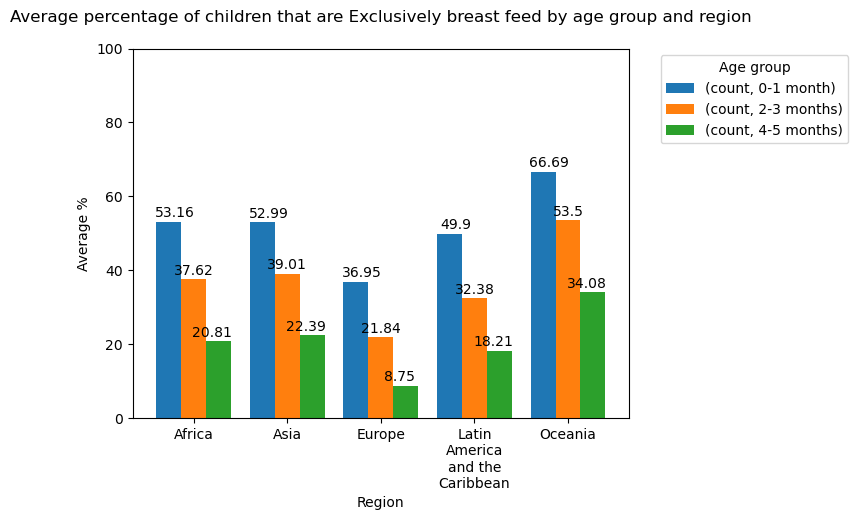

In [42]:
# set the max width for region names to 10 characters
max_width = 10

# wrap region names to fit within max width
df_diet_new_EB['region'] = df_diet_new_EB['region'].apply(lambda x: "\n".join(textwrap.wrap(x, width=max_width)))


# Group the DataFrame by region and disagg.value
counts = df_diet_new_EB.groupby(['region', 'disagg.value'])['exclusive_breastfeeding'].mean().round(2)

# Convert the values to a DataFrame and unstack the second level of the index
counts_df = counts.to_frame(name='count').unstack(level=1)

# Plot a clustered bar chart for each region
ax = counts_df.plot(kind='bar', rot=0, width=0.8)

# Add annotations to the bars
for i, region in enumerate(counts_df.index):
    for j, col in enumerate(counts_df.columns):
        value = counts_df.loc[region, col]
        ax.text(i+(j-1)*0.2, value+0.5, value, ha='center', va='bottom', rotation=0)


plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylim(top=100)
plt.ylabel('Average %')
plt.title('Average percentage of children that are Exclusively breast feed by age group and region', y=1.05)
plt.legend(title='Age group', bbox_to_anchor=(1.05, 1), loc='upper left');

In [44]:
df_diet_new_MDD = df_diet_new.loc[df_diet_new['disagg.value'].isin(['6-11 months', '12-15 months', '16-19 months', '20-23 months']), ['region','disagg.value', 'minimum_diet_diversity']]
df_diet_new_MDD.head()

,region,disagg.value,minimum_diet_diversity
1,Asia,12-15 months,26.92
3,Asia,16-19 months,25.83
5,Asia,20-23 months,23.25
7,Asia,6-11 months,14.46
26,Africa,12-15 months,31.23


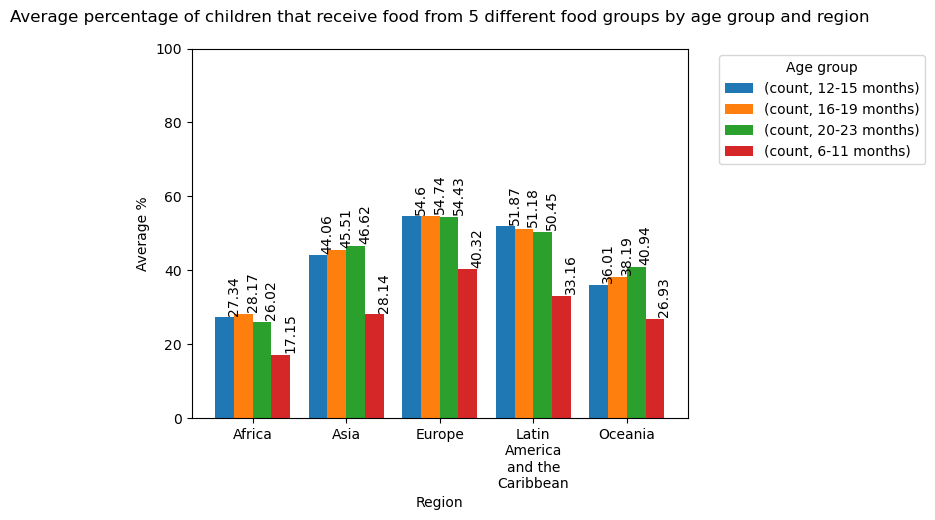

In [45]:
# set the max width for region names to 10 characters
max_width = 10

# wrap region names to fit within max width
df_diet_new_MDD['region'] = df_diet_new_MDD['region'].apply(lambda x: "\n".join(textwrap.wrap(x, width=max_width)))


# Group the DataFrame by region and disagg.value
counts = df_diet_new_MDD.groupby(['region', 'disagg.value'])['minimum_diet_diversity'].mean().round(2)

# Convert the values to a DataFrame and unstack the second level of the index
counts_df = counts.to_frame(name='count').unstack(level=1)

# Plot a clustered bar chart for each region
ax = counts_df.plot(kind='bar', rot=0, width=0.8)

# Add annotations to the bars
for i, region in enumerate(counts_df.index):
    for j, col in enumerate(counts_df.columns):
        value = counts_df.loc[region, col]
        ax.text(i+(j-1)*0.2, value+0.5, value, ha='center', va='bottom', rotation=90)


plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylim(top=100)
plt.ylabel('Average %')
plt.title('Average percentage of children that receive food from 5 different food groups by age group and region', y=1.05)
plt.legend(title='Age group', bbox_to_anchor=(1.05, 1), loc='upper left');

In [46]:
df_diet_new_MM = df_diet_new.loc[df_diet_new['disagg.value'].isin(['6-11 months', '12-15 months', '16-19 months', '20-23 months']), ['region','disagg.value', 'minimum_meal']]
df_diet_new_MM

,region,disagg.value,minimum_meal
1,Asia,12-15 months,51.140000
3,Asia,16-19 months,51.730000
5,Asia,20-23 months,51.110000
7,Asia,6-11 months,44.070000
26,Africa,12-15 months,24.810000
28,Africa,16-19 months,28.490000
30,Africa,20-23 months,28.000000
32,Africa,6-11 months,38.250000
51,Europe,12-15 months,38.850000
53,Europe,16-19 months,49.880000


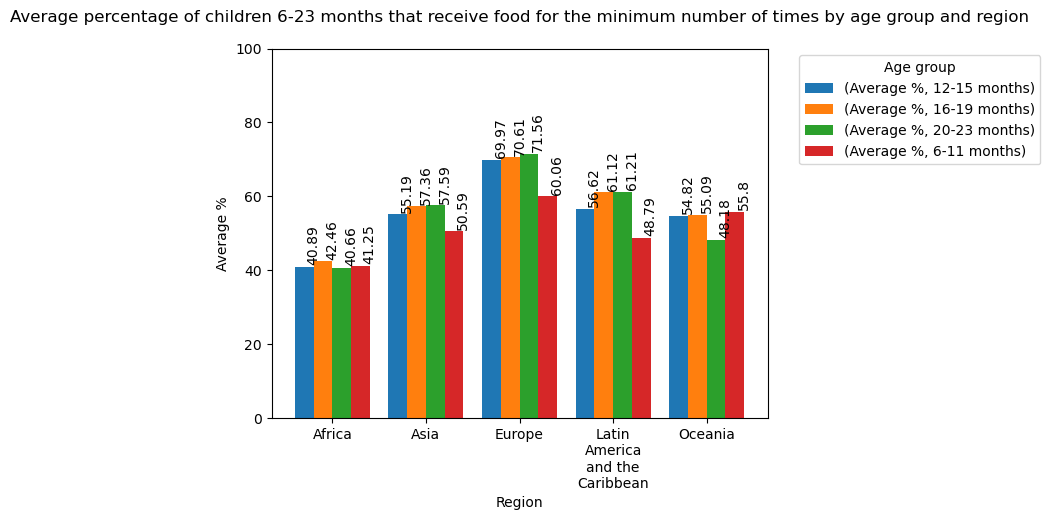

In [47]:
# set the max width for region names to 10 characters
max_width = 10

# wrap region names to fit within max width
df_diet_new_MM['region'] = df_diet_new_MM['region'].apply(lambda x: "\n".join(textwrap.wrap(x, width=max_width)))


# Group the DataFrame by region and disagg.value
counts = df_diet_new_MM.groupby(['region', 'disagg.value'])['minimum_meal'].mean().round(2)

# Convert the values to a DataFrame and unstack the second level of the index
counts_df = counts.to_frame(name='Average %').unstack(level=1)

# Plot a clustered bar chart for each region
ax = counts_df.plot(kind='bar', rot=0, width=0.8)

# Add annotations to the bars
for i, region in enumerate(counts_df.index):
    for j, col in enumerate(counts_df.columns):
        value = counts_df.loc[region, col]
        ax.text(i+(j-1)*0.2, value+0.5, value, ha='center', va='bottom', rotation=90)


plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylim(top=100)
plt.ylabel('Average %')
plt.title('Average percentage of children 6-23 months that receive food for the minimum number of times by age group and region', y=1.05)
plt.legend(title='Age group', bbox_to_anchor=(1.05, 1), loc='upper left');

## Merging the Datasets

In [58]:
# find rows where disaggregation is age
df_diet_n = df_diet.query('disaggregation == "sex"')

In [59]:
# find rows where disagg.value is boys and girls
df_diet_value = df_diet_n[df_diet_n['disagg.value'].str.contains('Both') == False]

In [60]:
# reset_index
df_diet_value.reset_index(drop=True, inplace=True)

In [61]:
df_diet_value['disagg.value'].value_counts()

Boys     123
Girls    123
Name: disagg.value, dtype: int64

In [62]:
# get all boys rows
Boys = df_BOM[df_BOM['disagg.value'] == "Boys"]

In [63]:
# add _1 to the end of iso3 to differentiate between boy and girl
Boys['iso3'] = Boys['iso3'].astype(str) + '_1'
Boys.head()

,iso3,country,region,subregion,disaggregation,disagg.value,section,overall_overweight,overall_stunting,overall_wasting
24,AFG_1,Afghanistan,Asia,Southern Asia,sex,Boys,Burden of malnutrition,5.07,46.523333,8.103333
62,AGO_1,Angola,Africa,Middle Africa,sex,Boys,Burden of malnutrition,3.15,36.705000,6.885000
100,ALB_1,Albania,Europe,Southern Europe,sex,Boys,Burden of malnutrition,23.64,25.902500,8.327500
117,AND_1,Andorra,Europe,Southern Europe,sex,Boys,Burden of malnutrition,0.00,0.000000,0.000000
135,ARE_1,United Arab Emirates,Asia,Western Asia,sex,Boys,Burden of malnutrition,0.00,0.000000,0.000000


In [64]:
# perform same for girls
girls = df_BOM[df_BOM['disagg.value'] == "Girls"]
girls['iso3'] = girls['iso3'].astype(str) + '_2'

In [65]:
# join the two dataset together
df3 = pd.concat([Boys, girls])

In [66]:
# check shape
df3.shape

(382, 10)

In [67]:
# same for diet data (boys)
d_boys = df_diet_value[df_diet_value['disagg.value'] == "Boys"]
d_boys['iso3'] = d_boys['iso3'].astype(str) + '_1'

In [68]:
# same for diet data (girls)
d_girls = df_diet_value[df_diet_value['disagg.value'] == "Girls"]
d_girls['iso3'] = d_girls['iso3'].astype(str) + '_2'

In [69]:
# join the two datasets together
df4 = pd.concat([d_boys, d_girls])


In [70]:
# check shape
df4.shape

(246, 14)

#### Final Datasets for Burden of Malnutrition and Diet

In [71]:
# burden of malnutrition
final_country = df3.sort_values('iso3')
final_country.head()

,iso3,country,region,subregion,disaggregation,disagg.value,section,overall_overweight,overall_stunting,overall_wasting
24,AFG_1,Afghanistan,Asia,Southern Asia,sex,Boys,Burden of malnutrition,5.070000,46.523333,8.103333
28,AFG_2,Afghanistan,Asia,Southern Asia,sex,Girls,Burden of malnutrition,4.206667,45.370000,7.376667
62,AGO_1,Angola,Africa,Middle Africa,sex,Boys,Burden of malnutrition,3.150000,36.705000,6.885000
66,AGO_2,Angola,Africa,Middle Africa,sex,Girls,Burden of malnutrition,3.600000,30.120000,6.190000
100,ALB_1,Albania,Europe,Southern Europe,sex,Boys,Burden of malnutrition,23.640000,25.902500,8.327500


In [72]:
final_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 24 to 5897
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   iso3                382 non-null    object 
 1   country             382 non-null    object 
 2   region              382 non-null    object 
 3   subregion           382 non-null    object 
 4   disaggregation      382 non-null    object 
 5   disagg.value        382 non-null    object 
 6   section             382 non-null    object 
 7   overall_overweight  382 non-null    float64
 8   overall_stunting    382 non-null    float64
 9   overall_wasting     382 non-null    float64
dtypes: float64(3), object(7)
memory usage: 32.8+ KB


In [73]:
#final_country.drop(final_country.columns[[2,3,4,5,6]], axis=1, inplace=True)

# reset index
final_country.reset_index(inplace = True, drop = True)

In [74]:
# country Diet
final_diet = df4.sort_values('iso3')
final_diet.head()

,iso3,country,region,subregion,disaggregation,disagg.value,section,continued_breastfeeding_1yr,early_initiation,exclusive_breastfeeding,minimum_accept_diet,minimum_diet_diversity,minimum_meal,solid_foods
0,AFG_1,Afghanistan,Asia,Southern Asia,sex,Boys,Diet,73.66,40.83,43.030,14.99,21.23,49.14,60.000
1,AFG_2,Afghanistan,Asia,Southern Asia,sex,Girls,Diet,73.94,40.97,43.240,15.32,22.93,48.67,62.100
2,AGO_1,Angola,Africa,Middle Africa,sex,Boys,Diet,68.22,48.34,34.540,12.73,29.37,32.17,74.000
3,AGO_2,Angola,Africa,Middle Africa,sex,Girls,Diet,64.96,48.30,40.110,11.65,28.77,29.83,85.100
4,ALB_1,Albania,Europe,Southern Europe,sex,Boys,Diet,43.09,50.15,20.805,25.10,58.87,42.89,86.515


In [75]:
final_diet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   iso3                         246 non-null    object 
 1   country                      246 non-null    object 
 2   region                       246 non-null    object 
 3   subregion                    246 non-null    object 
 4   disaggregation               246 non-null    object 
 5   disagg.value                 246 non-null    object 
 6   section                      246 non-null    object 
 7   continued_breastfeeding_1yr  246 non-null    float64
 8   early_initiation             246 non-null    float64
 9   exclusive_breastfeeding      246 non-null    float64
 10  minimum_accept_diet          246 non-null    float64
 11  minimum_diet_diversity       246 non-null    float64
 12  minimum_meal                 246 non-null    float64
 13  solid_foods         

In [76]:
final_diet.drop(final_diet.columns[[2,3,4,5,6]], axis=1, inplace=True)

In [77]:
# merge the two dataset
df = pd.merge(final_country, final_diet, how='left', on='iso3')
df.head()

,iso3,country_x,region,subregion,disaggregation,disagg.value,section,overall_overweight,overall_stunting,overall_wasting,country_y,continued_breastfeeding_1yr,early_initiation,exclusive_breastfeeding,minimum_accept_diet,minimum_diet_diversity,minimum_meal,solid_foods
0,AFG_1,Afghanistan,Asia,Southern Asia,sex,Boys,Burden of malnutrition,5.070000,46.523333,8.103333,Afghanistan,73.66,40.83,43.030,14.99,21.23,49.14,60.000
1,AFG_2,Afghanistan,Asia,Southern Asia,sex,Girls,Burden of malnutrition,4.206667,45.370000,7.376667,Afghanistan,73.94,40.97,43.240,15.32,22.93,48.67,62.100
2,AGO_1,Angola,Africa,Middle Africa,sex,Boys,Burden of malnutrition,3.150000,36.705000,6.885000,Angola,68.22,48.34,34.540,12.73,29.37,32.17,74.000
3,AGO_2,Angola,Africa,Middle Africa,sex,Girls,Burden of malnutrition,3.600000,30.120000,6.190000,Angola,64.96,48.30,40.110,11.65,28.77,29.83,85.100
4,ALB_1,Albania,Europe,Southern Europe,sex,Boys,Burden of malnutrition,23.640000,25.902500,8.327500,Albania,43.09,50.15,20.805,25.10,58.87,42.89,86.515


In [78]:
# find shape
df.shape

(382, 18)

In [79]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   iso3                         382 non-null    object 
 1   country_x                    382 non-null    object 
 2   region                       382 non-null    object 
 3   subregion                    382 non-null    object 
 4   disaggregation               382 non-null    object 
 5   disagg.value                 382 non-null    object 
 6   section                      382 non-null    object 
 7   overall_overweight           382 non-null    float64
 8   overall_stunting             382 non-null    float64
 9   overall_wasting              382 non-null    float64
 10  country_y                    246 non-null    object 
 11  continued_breastfeeding_1yr  246 non-null    float64
 12  early_initiation             246 non-null    float64
 13  exclusive_breastfeed

In [80]:
# drop country y
df.drop(['country_y'], axis=1, inplace=True)

In [81]:
# fill missing values with 0
df = df.fillna(0)
df.isnull().sum()

iso3                           0
country_x                      0
region                         0
subregion                      0
disaggregation                 0
disagg.value                   0
section                        0
overall_overweight             0
overall_stunting               0
overall_wasting                0
continued_breastfeeding_1yr    0
early_initiation               0
exclusive_breastfeeding        0
minimum_accept_diet            0
minimum_diet_diversity         0
minimum_meal                   0
solid_foods                    0
dtype: int64

In [82]:
df.to_csv('EDA_data.csv', index=False)

## Other Visualizations

In [89]:
clean_data = df.copy()
clean_data.head()

,iso3,country_x,region,subregion,disaggregation,disagg.value,section,overall_overweight,overall_stunting,overall_wasting,continued_breastfeeding_1yr,early_initiation,exclusive_breastfeeding,minimum_accept_diet,minimum_diet_diversity,minimum_meal,solid_foods
0,AFG_1,Afghanistan,Asia,Southern Asia,sex,Boys,Burden of malnutrition,5.070000,46.523333,8.103333,73.66,40.83,43.030,14.99,21.23,49.14,60.000
1,AFG_2,Afghanistan,Asia,Southern Asia,sex,Girls,Burden of malnutrition,4.206667,45.370000,7.376667,73.94,40.97,43.240,15.32,22.93,48.67,62.100
2,AGO_1,Angola,Africa,Middle Africa,sex,Boys,Burden of malnutrition,3.150000,36.705000,6.885000,68.22,48.34,34.540,12.73,29.37,32.17,74.000
3,AGO_2,Angola,Africa,Middle Africa,sex,Girls,Burden of malnutrition,3.600000,30.120000,6.190000,64.96,48.30,40.110,11.65,28.77,29.83,85.100
4,ALB_1,Albania,Europe,Southern Europe,sex,Boys,Burden of malnutrition,23.640000,25.902500,8.327500,43.09,50.15,20.805,25.10,58.87,42.89,86.515


### Investigating the prevalence of Stunting, Wasting, Overweight at regional level

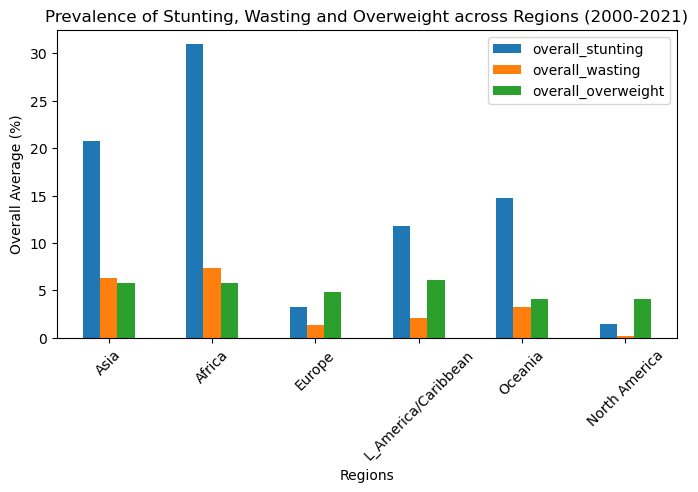

In [90]:
new_df = clean_data[['region', 'overall_stunting', 'overall_wasting', 'overall_overweight']]
new_df['region'] = new_df['region'].replace(['Latin America and the Caribbean'], 'L_America/Caribbean')
pd.pivot_table(new_df, index=['region'], sort=False).plot(kind='bar', figsize=(8,4));
plt.xticks(rotation=45);
plt.xlabel('Regions')
plt.ylabel('Overall Average (%)')
plt.title('Prevalence of Stunting, Wasting and Overweight across Regions (2000-2021)');

### Observation:
* Africa region have had the highest number of stunting and wasting cases over the past 2 decades seconded by Asia.
* North America records the lowest number of stunting cases in children under the age of 5 in the past two decades.

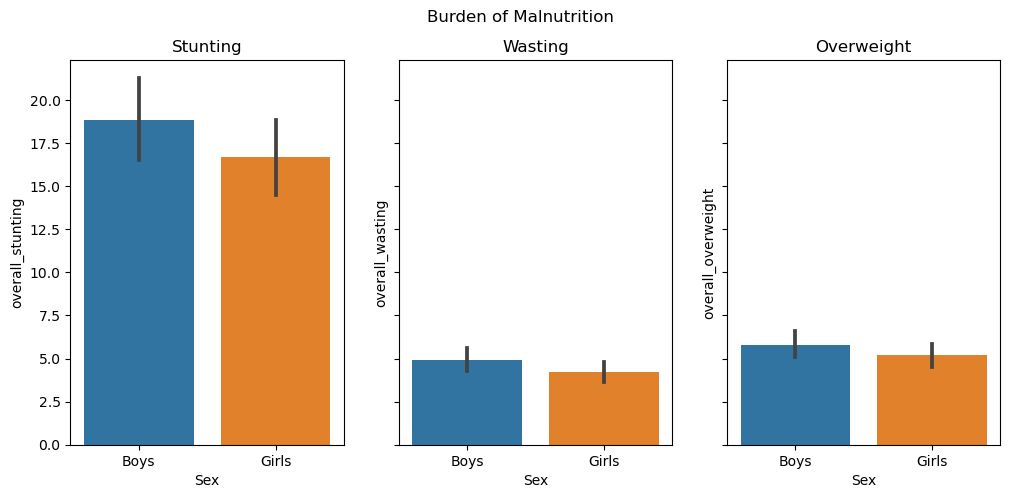

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True);
fig.suptitle('Burden of Malnutrition')

# Bulbasaur
sns.barplot(ax=axes[0], x='disagg.value', y='overall_stunting', data=clean_data);
axes[0].set_title('Stunting');
axes[0].set_xlabel('Sex');

# Charmander
sns.barplot(ax=axes[1], x='disagg.value', y='overall_wasting', data=clean_data);
axes[1].set_title('Wasting')
axes[1].set_xlabel('Sex');

# Squirtle
sns.barplot(ax=axes[2], x='disagg.value', y='overall_overweight', data=clean_data);
axes[2].set_title('Overweight')
axes[2].set_xlabel('Sex');

### Observation
* From the plot above, boys are leading in percentage in terms of stunting, wasting and overweight globally. This indicates that boys are at a higher risk of being burdened with malnutrition.
* The risk of stunting is three times higher than wasting and overweight.

### Analysing the diet variables

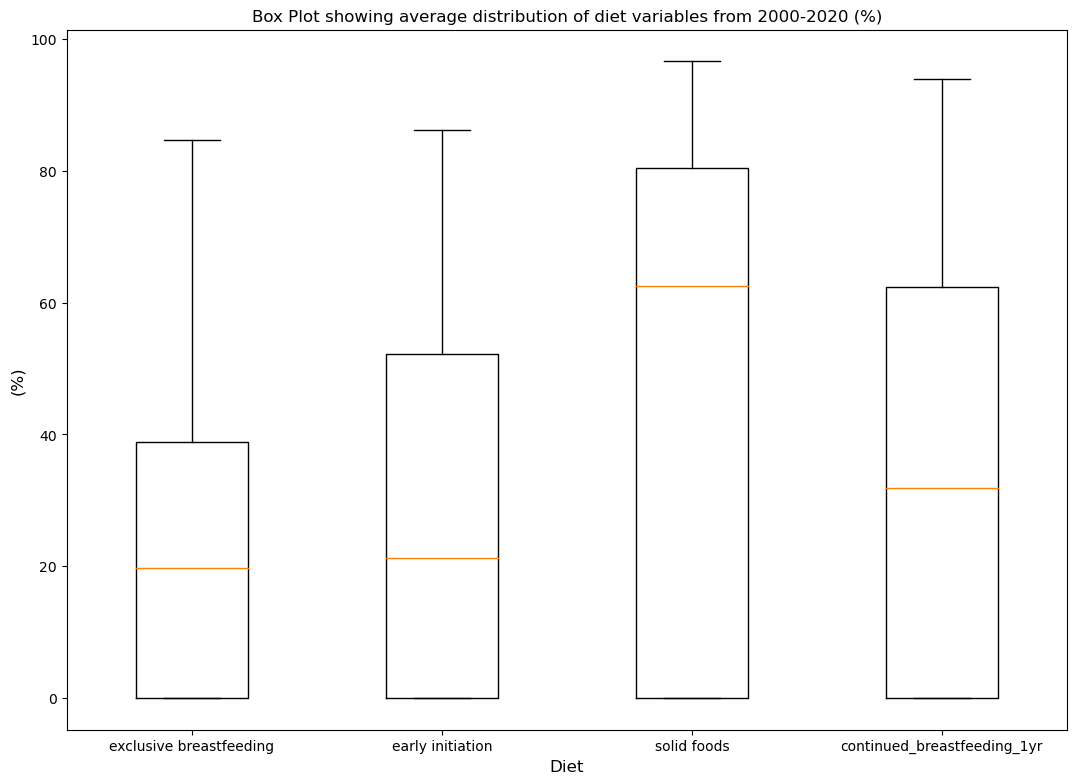

In [86]:
data_1 = clean_data[['country_x', 'exclusive_breastfeeding']].groupby('country_x').mean()
data_2 = clean_data[['country_x', 'early_initiation']].groupby('country_x').mean()
data_3 = clean_data[['country_x', 'solid_foods']].groupby('country_x').mean()
data_4 = clean_data[['country_x', 'continued_breastfeeding_1yr']].groupby('country_x').mean()


data = [data_1.values.flatten(), data_2.values.flatten(), data_3.values.flatten(), data_4.values.flatten()]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# x-axis labels
ax.set_xticklabels(['exclusive breastfeeding', 'early initiation', 'solid foods', 'continued_breastfeeding_1yr'])

ax.set_title('Box Plot showing average distribution of diet variables from 2000-2020 (%)')
# Creating plot
bp = ax.boxplot(data)
 
plt.xlabel('Diet', fontsize=12)
plt.ylabel('(%)', fontsize=12)

# show plot
plt.show()

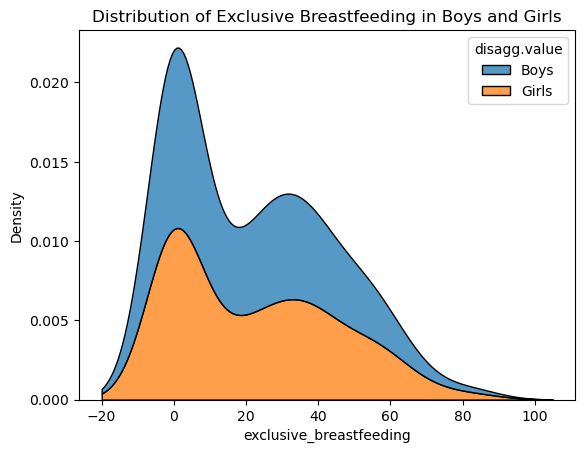

In [88]:
# Kde plot
sns.kdeplot(data=clean_data, x="exclusive_breastfeeding", hue='disagg.value', multiple="stack");
plt.title('Distribution of Exclusive Breastfeeding in Boys and Girls');